
Matriz Inicial de Valores de Estado (10x10):
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00

Matriz de Recompensas por Estado (10x10):
    100      -1      -1      -1      -1      -1      -1      -1      -1      -1
     -1      -1      -1      -1

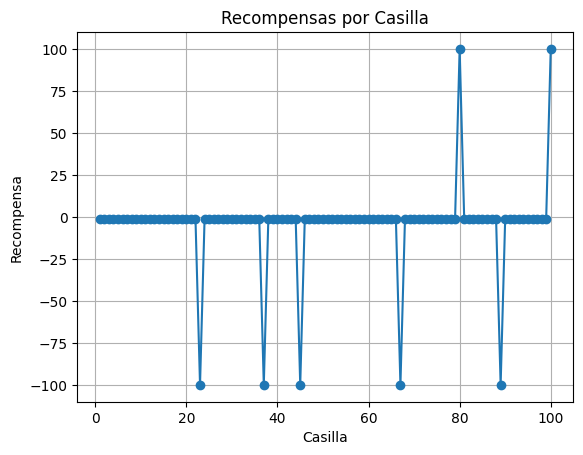

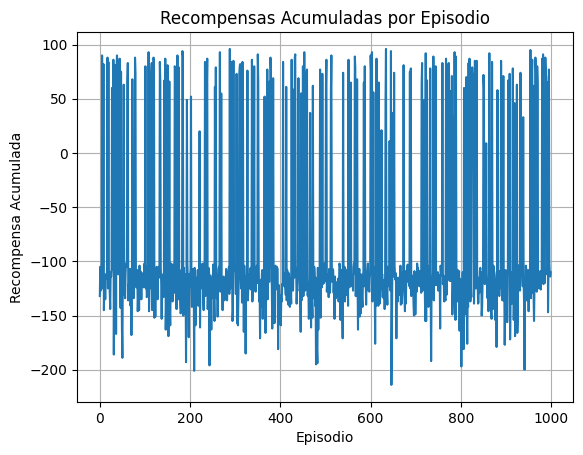


Matriz de Valores Finales de los Estados (10x10):
   0.00  -11.13    0.00   11.15    1.26    0.00  -10.99  -21.23    0.00  -36.37
   2.98   21.19    0.00   -9.84  -24.40  -30.57  -40.34  -30.08    0.00  -29.85
   0.00    0.24    2.23   16.82   19.28   -2.91    3.57    0.00  -13.58  -33.48
 -14.44    0.00  -16.70    0.00  -12.28    0.00    0.00  -24.95    0.00  -24.96
  -6.58    0.00   -7.30  -11.93  -13.34    0.00    0.00  -18.24    0.00  -32.86
 -49.90  -46.10    0.00    0.00    0.00    0.00  -23.08    0.00  -26.34    0.00
 -40.77  -38.15  -46.83    0.00  -45.24  -51.11  -58.02  -44.98  -46.66  -47.89
   0.00  -42.86    0.00  -38.27  -39.79  -46.46  -41.73  -43.16  -44.16  -42.00
 -37.02  -27.83  -26.75  -28.79  -26.34  -25.98  -27.17  -26.64  -27.03  -28.99
 -24.75  -25.84  -24.75  -25.20  -29.00  -27.88  -26.47    0.00  -26.90  -25.62


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Probabilidades del dado cargado
probabilidades = np.array([0.1, 0.2, 0.3, 0.2, 0.1, 0.1])

# Definición de escaleras y serpientes (sin la escalera 80 -> 100)
escaleras = {8: 26, 21: 82, 43: 77, 50: 91, 54: 93, 66: 87, 62: 96}
serpientes = {52: 11, 69: 33, 92: 51, 48: 9, 73: 1, 55: 7, 46: 5, 95: 24, 64: 36, 44: 22, 98: 28, 83: 19, 59: 17}

# Estados terminales
estadoGanar = [80, 100]
estadoPerder = [23, 37, 45, 67, 89]
estadosTerminales = set(estadoGanar + estadoPerder)

# Estados no válidos (solo entradas a escaleras y serpientes)
estadosInvalidos = set(escaleras.keys()).union(set(serpientes.keys()))

# Estados válidos (excluyendo entradas de escaleras, serpientes y terminales)
estadosValidos = set(range(1, 101)) - estadosTerminales - estadosInvalidos

# Inicialización de valores de estado en 0
valoresEstado = {s: 0 for s in range(1, 101)}

# Inicialización de recompensas
recompensasEstado = {s: (100 if s in estadoGanar else -100 if s in estadoPerder else -1) for s in range(1, 101)}

def mostrarMatrizInicial():
    matriz = np.zeros((10, 10), dtype=object)
    for i in range(10):
        for j in range(10):
            estado = i * 10 + (j + 1 if i % 2 == 0 else 10 - j)
            matriz[9 - i, j] = f"{valoresEstado[estado]:7.2f}"

    print("\nMatriz Inicial de Valores de Estado (10x10):")
    for fila in matriz:
        print(" ".join(str(valor) for valor in fila))

def mostrarMatrizRecompensas():
    matriz = np.zeros((10, 10), dtype=object)
    for i in range(10):
        for j in range(10):
            estado = i * 10 + (j + 1 if i % 2 == 0 else 10 - j)
            matriz[9 - i, j] = f"{recompensasEstado[estado]:7d}"

    print("\nMatriz de Recompensas por Estado (10x10):")
    for fila in matriz:
        print(" ".join(str(valor) for valor in fila))

def mostrarGraficoRecompensasPorCasilla():
    recompensas = [recompensasEstado[s] for s in range(1, 101)]
    plt.plot(range(1, 101), recompensas, marker='o')
    plt.xlabel("Casilla")
    plt.ylabel("Recompensa")
    plt.title("Recompensas por Casilla")
    plt.grid(True)
    plt.show()

def mostrarGraficoRecompensas(recompensas):
    plt.plot(recompensas)
    plt.xlabel("Episodio")
    plt.ylabel("Recompensa Acumulada")
    plt.title("Recompensas Acumuladas por Episodio")
    plt.grid(True)
    plt.show()

def calcularNuevoEstado(s, a, resultadoDado):
    if s in estadosTerminales:
        return s

    if a == "avanzar":
        nuevoEstado = s + resultadoDado
    elif a == "retroceder":
        nuevoEstado = s - resultadoDado
    else:
        raise ValueError("Acción no válida")

    if nuevoEstado > 100:
        nuevoEstado = 100 - (nuevoEstado - 100)
    elif nuevoEstado < 1:
        nuevoEstado = 1 + (1 - nuevoEstado)

    if nuevoEstado in escaleras:
        nuevoEstado = escaleras[nuevoEstado]
    if nuevoEstado in serpientes:
        nuevoEstado = serpientes[nuevoEstado]

    return nuevoEstado

def simularYActualizarJuego():
    recompensasAcumuladas = []
    for _ in range(1000):
        estado = 1
        recompensaAcumulada = 0
        while estado not in estadosTerminales:
            accion = np.random.choice(["avanzar", "retroceder"])
            resultadoDado = np.random.choice([1, 2, 3, 4, 5, 6], p=probabilidades)
            nuevoEstado = calcularNuevoEstado(estado, accion, resultadoDado)
            recompensa = recompensasEstado[nuevoEstado]
            
            # Aplicación de la ecuación de Bellman en cada paso
            sumaAccion = 0
            for dado, p in zip(range(1, 7), probabilidades):
                siguienteEstado = calcularNuevoEstado(estado, accion, dado)
                sumaAccion += p * (recompensasEstado[siguienteEstado] + 0.9 * valoresEstado[siguienteEstado])
            valoresEstado[estado] = 0.5 * sumaAccion + 0.5 * valoresEstado[estado]

            recompensaAcumulada += recompensa
            estado = nuevoEstado
        recompensasAcumuladas.append(recompensaAcumulada)
    return recompensasAcumuladas

def mostrarMatrizValores():
    matriz = np.zeros((10, 10), dtype=object)
    for i in range(10):
        for j in range(10):
            estado = i * 10 + (j + 1 if i % 2 == 0 else 10 - j)
            matriz[9 - i, j] = f"{valoresEstado[estado]:7.2f}"

    print("\nMatriz de Valores Finales de los Estados (10x10):")
    for fila in matriz:
        print(" ".join(str(valor) for valor in fila))

# Mostrar matrices y gráfico antes de simulaciones
mostrarMatrizInicial()
mostrarMatrizRecompensas()
mostrarGraficoRecompensasPorCasilla()

# Ejecutar la simulación con actualización en tiempo real usando la ecuación de Bellman
recompensas = simularYActualizarJuego()
mostrarGraficoRecompensas(recompensas)
mostrarMatrizValores()
